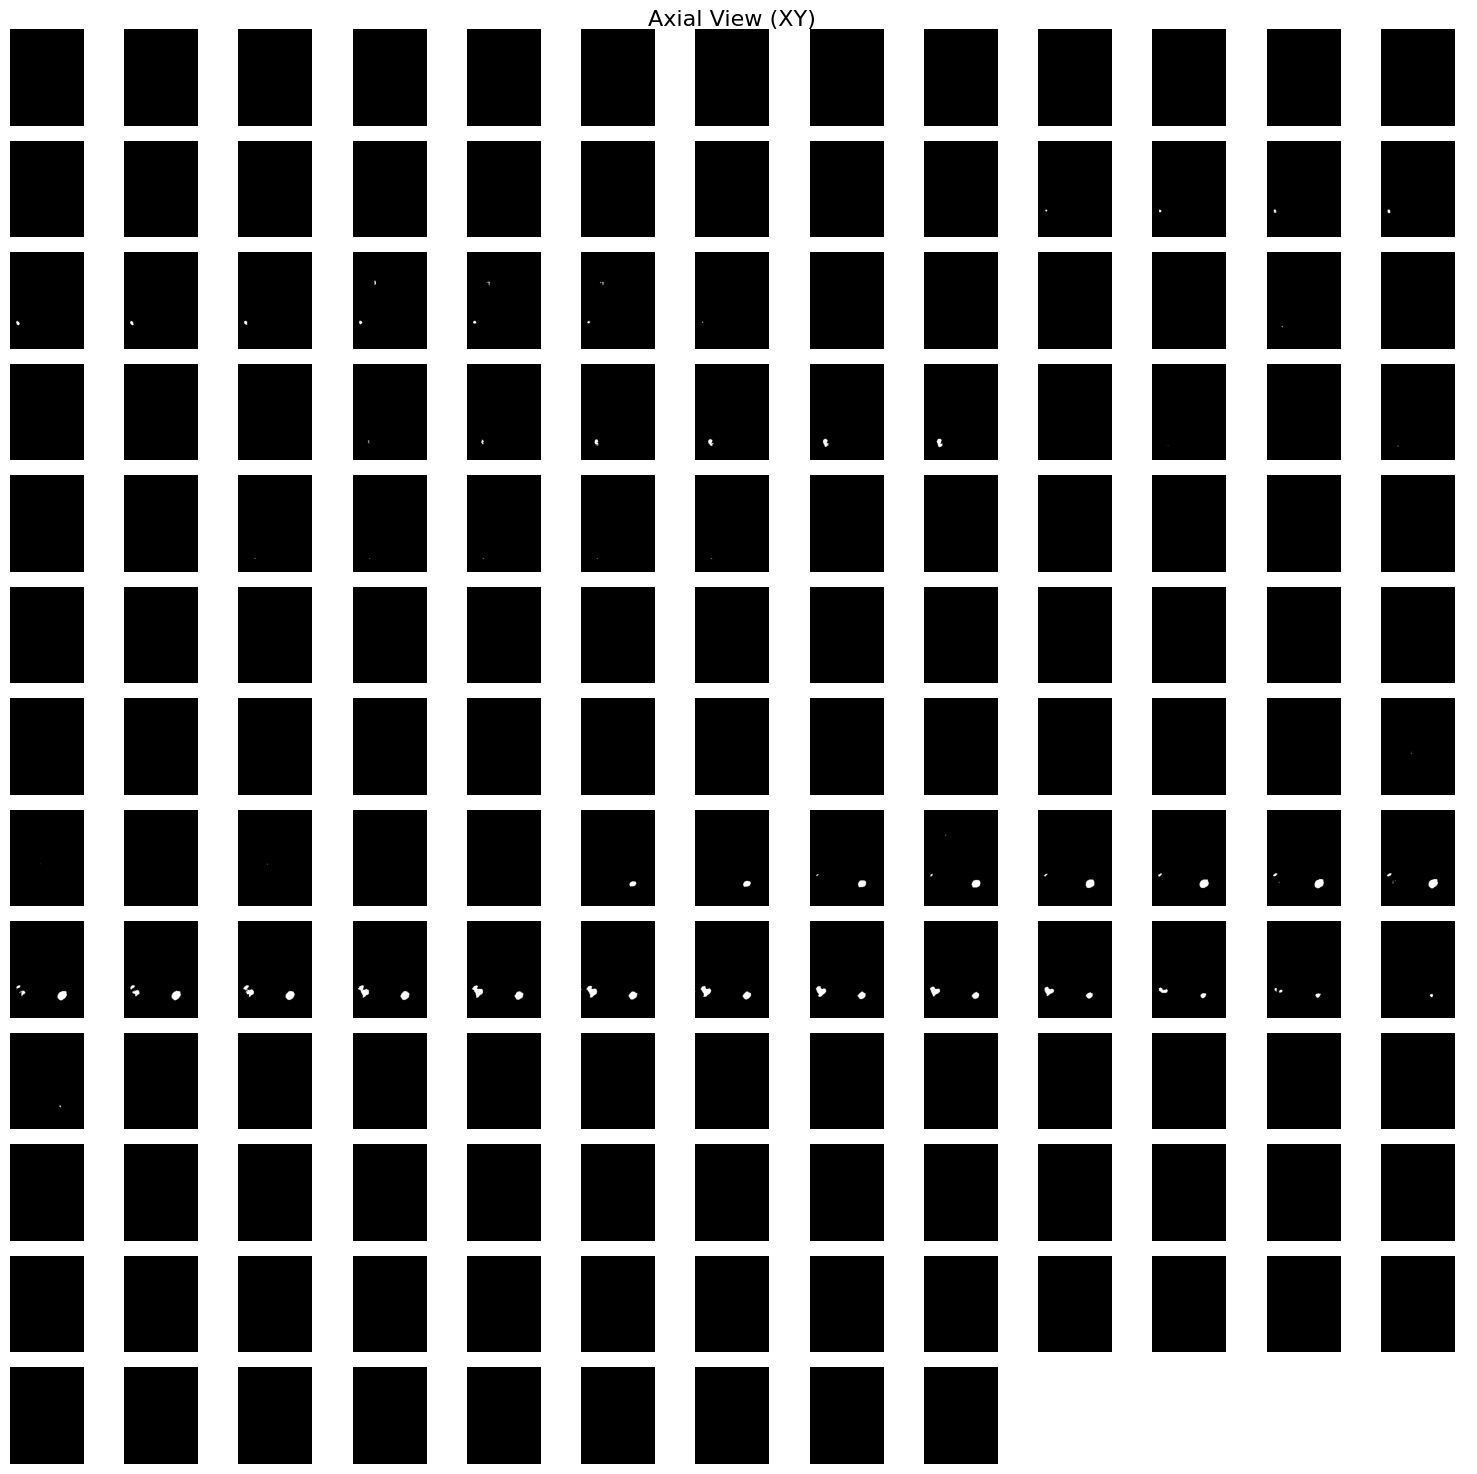

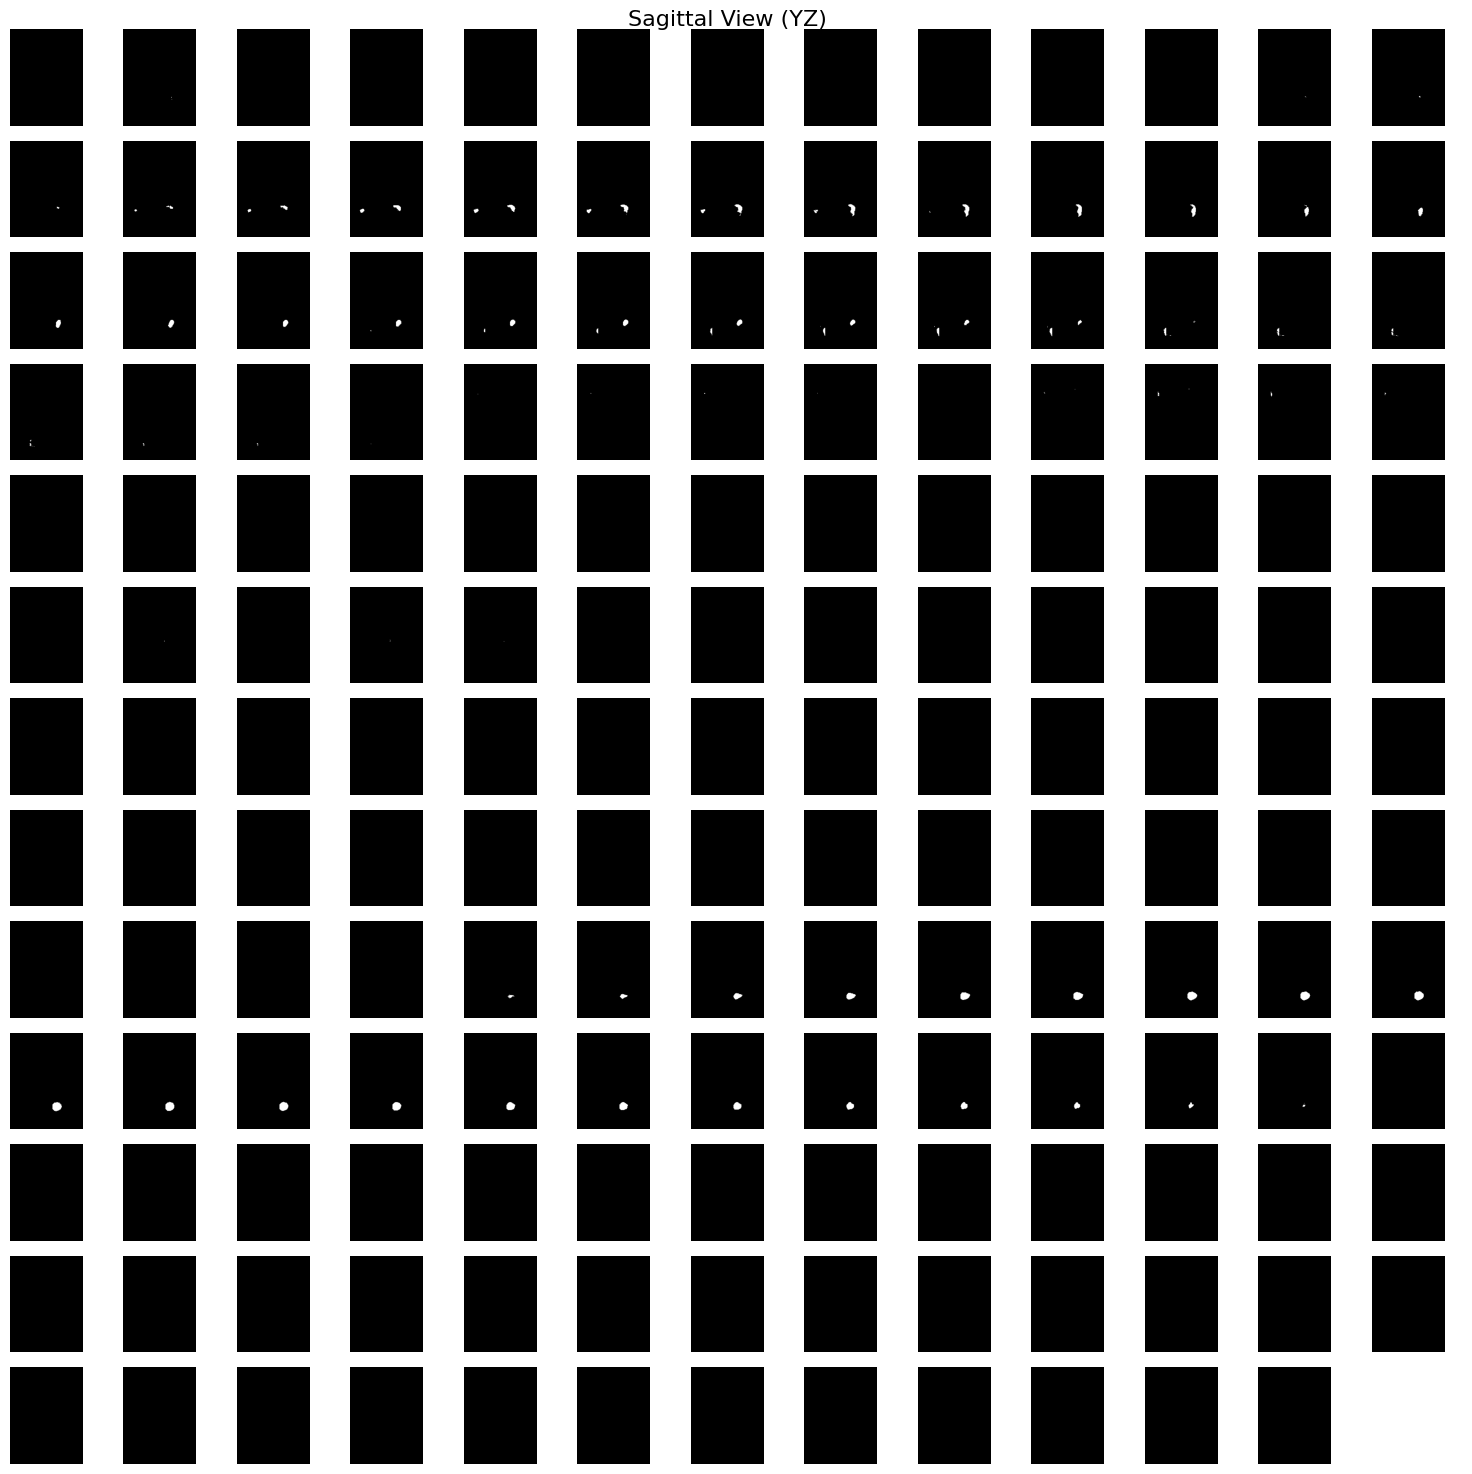

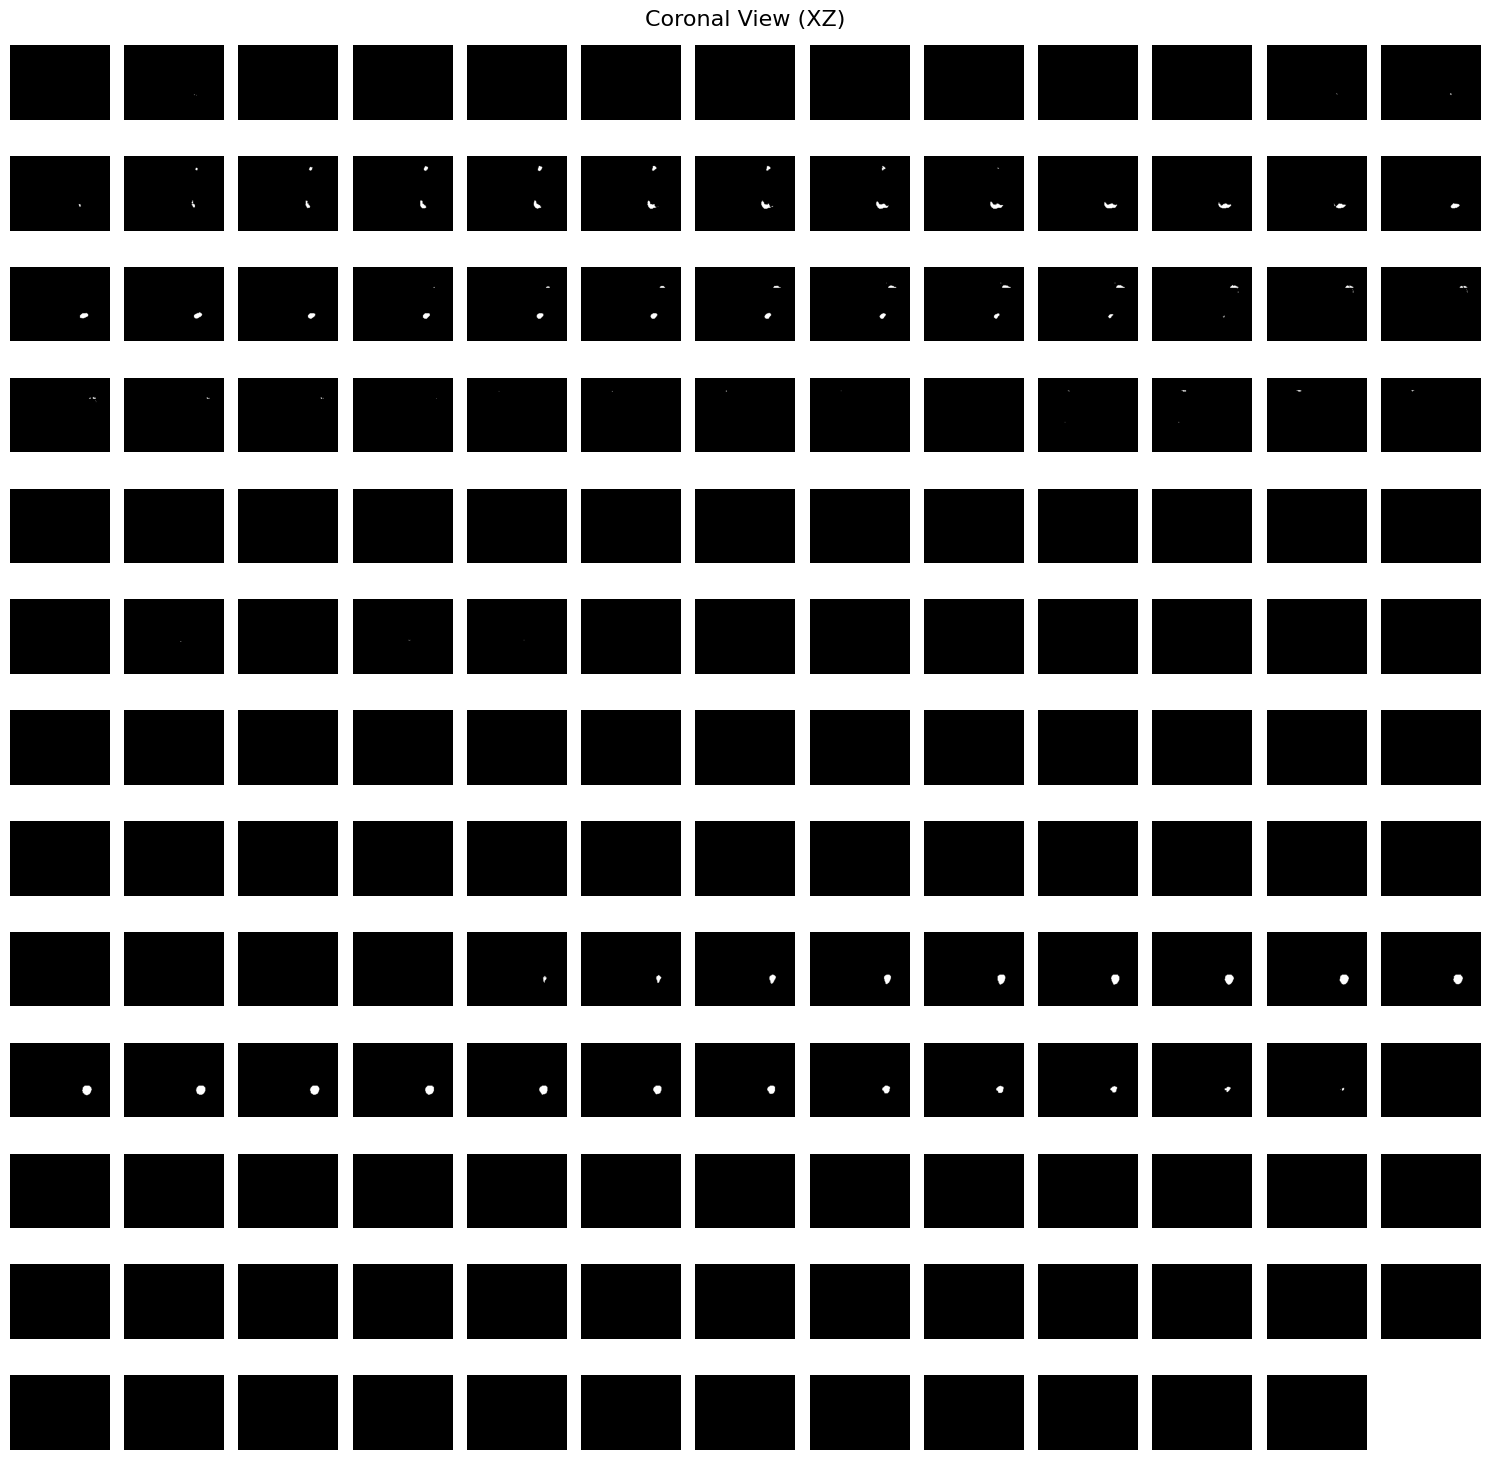

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show_slices(volume, view='axial'):
    """
    Display all slices in the given view: axial, sagittal, or coronal.
    """
    if view == 'axial':
        slices = volume
        title = 'Axial View (XY)'
    elif view == 'sagittal':
        slices = volume.transpose(2, 1, 0)
        title = 'Sagittal View (YZ)'
    elif view == 'coronal':
        slices = volume.transpose(2, 0, 1)
        title = 'Coronal View (XZ)'
    else:
        raise ValueError("Invalid view. Choose from 'axial', 'sagittal', 'coronal'.")

    num_slices = slices.shape[0]
    cols = int(np.ceil(np.sqrt(num_slices)))
    rows = int(np.ceil(num_slices / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    fig.suptitle(title, fontsize=16)
    for i in range(rows * cols):
        ax = axes[i // cols, i % cols]
        if i < num_slices:
            ax.imshow(slices[i], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# --- Load and visualize ---
file_path = '/home/ubuntu/projects/nasrin_brainaic/segmentation/output/FOMO2_sub_1_prediction.npy'  # Replace with your actual file
volume = np.load(file_path)

# Ensure volume is 3D
assert volume.ndim == 3, "Expected a 3D volume."

# Display all slices in each orientation
show_slices(volume, view='axial')
show_slices(volume, view='sagittal')
show_slices(volume, view='coronal')


In [2]:
import nibabel as nib
import os

# Define output path
nii_output_path = file_path.replace('.npy', '.nii.gz')  # Same name, different extension

# Define an identity affine matrix (or use a real one if available)
affine = np.eye(4)

# Convert numpy array to NIfTI
nifti_img = nib.Nifti1Image(volume, affine)

# Save as .nii.gz
nib.save(nifti_img, nii_output_path)

print(f"NIfTI file saved to: {nii_output_path}")


NIfTI file saved to: /home/ubuntu/projects/nasrin_brainaic/segmentation/output/FOMO2_sub_1_prediction.nii.gz
